Hello again, buddy! This is my last project of the subject BI-VZD concerned regression. Here I will try to predict the value of Probe Yield. As I do not know the history and description of the given data set, I will do my best to show the problem and to solve it.

In [ ]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from typing import Callable, Tuple
import matplotlib
%matplotlib inline
import warnings
import csv
warnings.filterwarnings('ignore')
np.set_printoptions(precision=5, suppress=True)

As we have imported almost all necessary libraries, let's upload data:

In [ ]:
data_train = pd.read_csv('du03train.csv')
data_test = pd.read_csv('du03test.csv')

## DATA DESCRIPTION

And this is how the training data look like:

In [ ]:
display(data_train.head())
display(data_train.shape)
display(data_train.info())
display(data_train.describe())

,lotWaferSiteid,lotWafer,lot,wafer,siteid,part,sampleProbe,ProbeYield,PARAM01,PARAM02,...,PARAM59,PARAM60,PARAM61,PARAM62,PARAM63,PARAM64,PARAM65,PARAM66,PARAM67,PARAM68
0,LOT0001-W01-S03,LOT0001-W01,LOT0001,1,3,PART1,False,99.72,23.86766,641.6292,...,47.482,138.6648,47.046,0.1595,3.5308,3.2956,1182.0,356.0,22.076,1.2592
1,LOT0001-W01-S02,LOT0001-W01,LOT0001,1,2,PART1,False,99.72,23.62033,635.4684,...,47.844,146.2031,48.014,0.1653,3.6352,3.3892,1177.0,355.0,23.488,1.2312
2,LOT0001-W01-S05,LOT0001-W01,LOT0001,1,5,PART1,False,99.72,23.81421,639.7266,...,48.870,148.2537,47.896,0.1655,3.6600,3.4276,1171.0,353.0,21.388,1.1424
3,LOT0001-W01-S01,LOT0001-W01,LOT0001,1,1,PART1,False,99.72,23.93652,645.3438,...,47.664,139.1869,46.420,0.1644,3.6512,3.4172,1179.0,354.0,20.704,1.2328
4,LOT0001-W01-S04,LOT0001-W01,LOT0001,1,4,PART1,False,99.72,23.96914,656.9406,...,48.172,140.6431,48.442,0.1659,3.6608,3.4148,1178.0,352.0,20.112,1.1832


(212296, 76)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212296 entries, 0 to 212295
Data columns (total 76 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   lotWaferSiteid  212296 non-null  object 
 1   lotWafer        212296 non-null  object 
 2   lot             212296 non-null  object 
 3   wafer           212296 non-null  int64  
 4   siteid          212296 non-null  int64  
 5   part            212296 non-null  object 
 6   sampleProbe     212296 non-null  bool   
 7   ProbeYield      212296 non-null  float64
 8   PARAM01         212296 non-null  float64
 9   PARAM02         212296 non-null  float64
 10  PARAM03         212296 non-null  float64
 11  PARAM04         212296 non-null  float64
 12  PARAM05         212296 non-null  float64
 13  PARAM06         212296 non-null  float64
 14  PARAM07         212296 non-null  float64
 15  PARAM08         212296 non-null  int64  
 16  PARAM09         212296 non-null  float64
 17  PARAM10   

None

,wafer,siteid,ProbeYield,PARAM01,PARAM02,PARAM03,PARAM04,PARAM05,PARAM06,PARAM07,...,PARAM59,PARAM60,PARAM61,PARAM62,PARAM63,PARAM64,PARAM65,PARAM66,PARAM67,PARAM68
count,212296.000000,212296.000000,212296.000000,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05,212296.000000,212296.000000,2.122960e+05,...,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05,2.122960e+05
mean,12.733716,2.999991,98.651025,1.347176e+18,1.321268e+18,1.709877e+18,1.761691e+18,67.718876,68.368978,1.709877e+18,...,2.260994e+16,1.314203e+29,2.826243e+16,3.203075e+16,3.297283e+16,4.993029e+16,3.203075e+16,3.250179e+16,2.449410e+16,3.061763e+16
std,7.035063,1.414220,4.235477,8.606792e+19,8.523652e+19,9.696104e+19,9.841872e+19,2.608255,2.652471,9.696104e+19,...,1.503494e+18,2.018384e+31,1.680910e+18,1.789431e+18,1.815547e+18,8.439144e+18,1.789431e+18,1.802537e+18,1.564871e+18,1.749526e+18
min,1.000000,1.000000,0.000000,-4.892090e+02,3.352200e+00,-3.179860e+02,-4.782590e+03,0.000000,0.000000,-9.349990e+02,...,0.000000e+00,-1.180270e+06,0.000000e+00,1.400000e-03,9.076000e-01,-2.277830e+01,5.392190e+01,2.360000e+02,-7.738170e+02,-2.314440e+01
25%,7.000000,2.000000,98.970000,2.104638e+01,5.593644e+02,2.907082e+01,1.666496e+03,66.904000,67.540600,1.279997e+02,...,4.867000e+01,1.453415e+02,4.897000e+01,1.636000e-01,3.760800e+00,3.512800e+00,1.186000e+03,3.550000e+02,2.027600e+01,1.024800e+00
50%,13.000000,3.000000,99.770000,2.135690e+01,5.767596e+02,2.972133e+01,1.704800e+03,67.752000,68.404700,1.287245e+02,...,4.924400e+01,1.558770e+02,4.955200e+01,1.657000e-01,3.832000e+00,3.580400e+00,1.197000e+03,3.590000e+02,2.118800e+01,1.068680e+00
75%,19.000000,4.000000,99.960000,2.167605e+01,6.002250e+02,3.049505e+01,1.744050e+03,68.504000,69.180000,1.294674e+02,...,4.969400e+01,1.641982e+02,5.004800e+01,1.678000e-01,3.906400e+00,3.649200e+00,1.210000e+03,3.640000e+02,2.229690e+01,1.116000e+00
max,25.000000,5.000000,100.000000,5.500000e+21,5.500000e+21,5.500000e+21,5.500000e+21,200.012000,200.012000,5.500000e+21,...,1.000000e+20,3.100000e+33,1.000000e+20,1.000000e+20,1.000000e+20,3.800000e+21,1.000000e+20,1.000000e+20,1.000000e+20,1.000000e+20


The only difference between training data structure and testing is missing column for Probe Yield, which we should predict there and have no guarantee there will be no mistakes.

In [ ]:
display(data_test.head())

,lotWaferSiteid,lotWafer,lot,wafer,siteid,part,sampleProbe,PARAM01,PARAM02,PARAM03,...,PARAM59,PARAM60,PARAM61,PARAM62,PARAM63,PARAM64,PARAM65,PARAM66,PARAM67,PARAM68
0,LOT0001-W06-S03,LOT0001-W06,LOT0001,6,3,PART1,False,23.43731,639.9984,30.85745,...,48.482,136.8676,49.194,0.1595,3.6144,3.3700,1188.0,356.0,21.048,1.2700
1,LOT0001-W06-S02,LOT0001-W06,LOT0001,6,2,PART1,False,23.51704,656.9406,30.76414,...,47.672,143.7876,47.284,0.1663,3.6808,3.4296,1185.0,358.0,21.900,1.2868
2,LOT0001-W06-S05,LOT0001-W06,LOT0001,6,5,PART1,False,23.21716,655.0380,30.76504,...,47.990,142.4034,48.520,0.1667,3.7012,3.4612,1180.0,353.0,22.076,1.1464
3,LOT0001-W06-S01,LOT0001-W06,LOT0001,6,1,PART1,False,23.43097,651.3234,30.65632,...,48.532,138.6648,47.930,0.1643,3.6752,3.4356,1178.0,354.0,21.836,1.1760
4,LOT0001-W06-S04,LOT0001-W06,LOT0001,6,4,PART1,False,23.83324,674.4264,30.57478,...,47.506,138.7950,46.942,0.1659,3.7008,3.4364,1184.0,353.0,20.384,1.1008


## DATA VISUALIZATION

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
import plotly.express as px

Identifying the distribution of every column in this dataset:

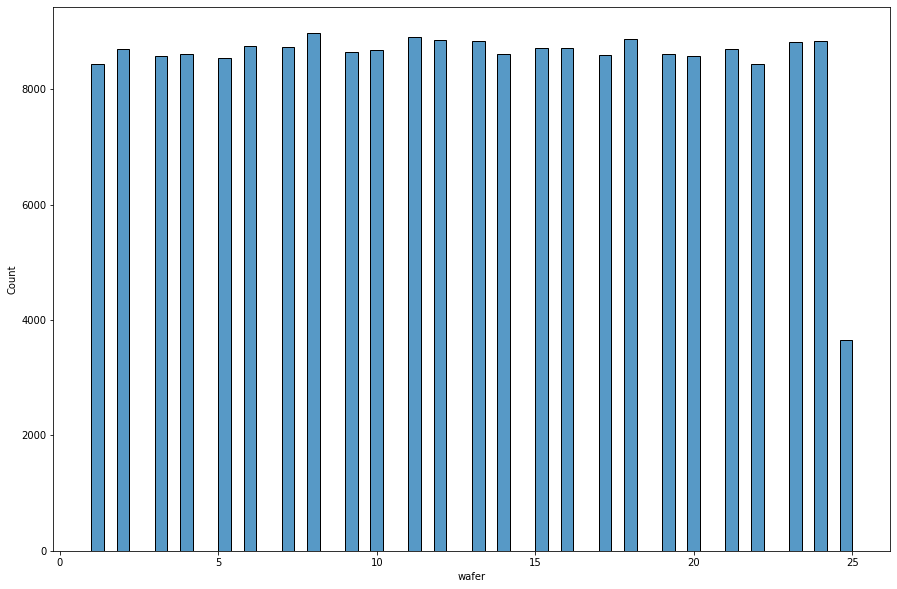

In [ ]:
plt.figure(figsize = (15,10))
sns.histplot(data_train['wafer'])
plt.show()

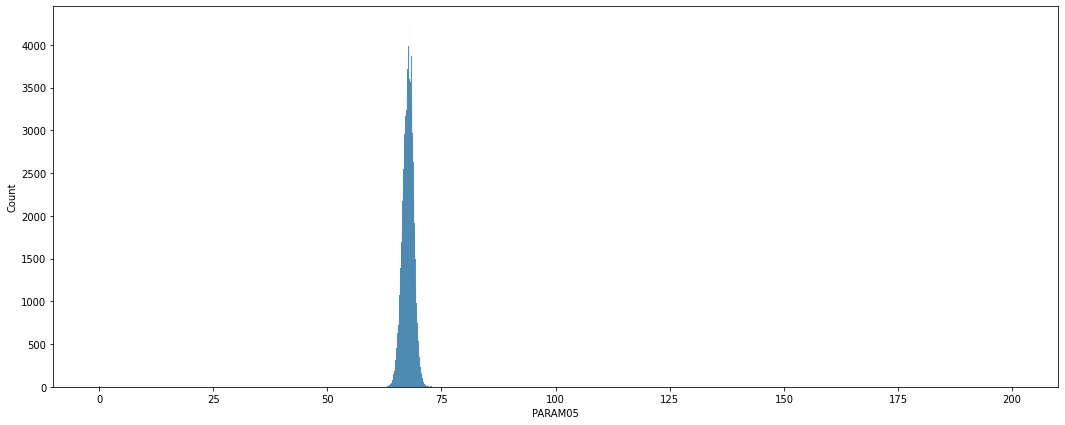

In [ ]:
plt.figure(figsize = (18,7))
sns.histplot(data_train['PARAM05'])
plt.show()

## PREPROCESSING DATA

Now goes the least nice part I call "data cleaning", cause we should prepare our data properly.

### Removing unnecessary columns:

In [ ]:
data_train = data_train.replace('?', np.nan)
data_train.isnull().sum(axis=0)

lotWaferSiteid    0
lotWafer          0
lot               0
wafer             0
siteid            0
                 ..
PARAM64           0
PARAM65           0
PARAM66           0
PARAM67           0
PARAM68           0
Length: 76, dtype: int64

Very nice, we have no missing values in our training set. Now we should move to the part of dealing with non-numeric values. As we have lot, wafer and site id as three extra columns, I'd like to delete the first two columns and replace the third one with dummy variables:

In [ ]:
data_train.drop(columns=['part'], inplace=True)
data_train.drop(columns=['lotWaferSiteid', 'lotWafer'], inplace=True)
data_train.drop(columns=['lot'], inplace=True)

data_test.drop(columns=['part'], inplace=True)
data_test.drop(columns=['lotWaferSiteid', 'lotWafer'], inplace=True)
data_test.drop(columns=['lot'], inplace=True)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212296 entries, 0 to 212295
Data columns (total 72 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   wafer        212296 non-null  int64  
 1   siteid       212296 non-null  int64  
 2   sampleProbe  212296 non-null  bool   
 3   ProbeYield   212296 non-null  float64
 4   PARAM01      212296 non-null  float64
 5   PARAM02      212296 non-null  float64
 6   PARAM03      212296 non-null  float64
 7   PARAM04      212296 non-null  float64
 8   PARAM05      212296 non-null  float64
 9   PARAM06      212296 non-null  float64
 10  PARAM07      212296 non-null  float64
 11  PARAM08      212296 non-null  int64  
 12  PARAM09      212296 non-null  float64
 13  PARAM10      212296 non-null  float64
 14  PARAM11      212296 non-null  float64
 15  PARAM12      212296 non-null  float64
 16  PARAM13      212296 non-null  float64
 17  PARAM14      212296 non-null  float64
 18  PARAM15      212296 non-

It is always better to keep data in one format. As we have only numeric data left - I vote to float type reform.

In [ ]:
data_train['PARAM08'] = data_train['PARAM08'].astype(float)
data_train['siteid'] = data_train['siteid'].astype(float)
data_train['wafer'] = data_train['wafer'].astype(float)
data_train['sampleProbe'] = data_train['sampleProbe'].astype(float)

data_test['PARAM08'] = data_train['PARAM08'].astype('float32')
data_test['siteid'] = data_train['siteid'].astype('float32')
data_test['wafer'] = data_train['wafer'].astype('float32')
data_test['sampleProbe'] = data_train['sampleProbe'].astype('float32')

### Dealing with outliers:

Box plots usually shows the outliers so clearly:

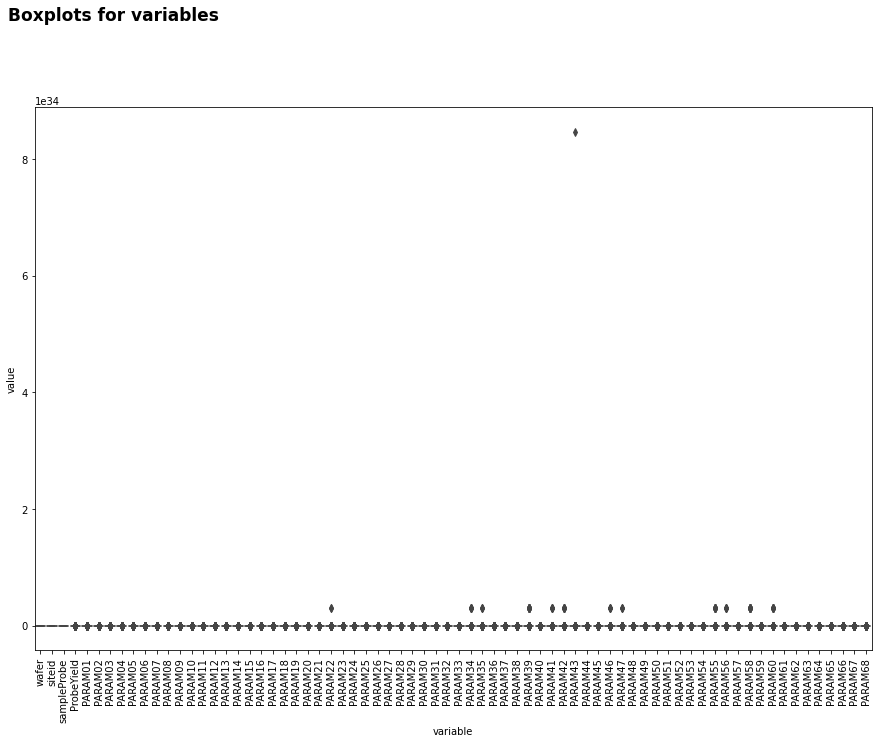

In [ ]:
data_melt = data_train.melt()
plt.figure(figsize=(15,10))
plt.figtext(0.1, 1, "Boxplots for variables", fontsize=17, fontweight='bold')
fg = sns.boxplot(x='variable', y='value', data=data_melt)
fg.set_xticklabels(fg.get_xticklabels(), rotation=90)
plt.show()

In [ ]:
data_train_before = data_train.copy()

Now we have names of columns we should pay our most attention to:

In [ ]:
columns_out = ['PARAM43', 'PARAM22', 'PARAM34', 'PARAM35', 'PARAM39', 'PARAM41', 'PARAM42', 'PARAM46', 'PARAM47', 'PARAM55', 'PARAM56', 'PARAM58', 'PARAM60']

I have seen one good option how to determine outliers - IQR score:

In [ ]:
for column in columns_out:
    for x in [column]:
        q75,q25 = np.percentile(data_train.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)
 
        data_train.loc[data_train[x] < min,x] = np.nan
        data_train.loc[data_train[x] > max,x] = np.nan

In [ ]:
data_train = data_train.dropna(axis = 0)
data_train.shape

(189360, 72)

Oops, pretty high amount of outliers was removed from out data set. But we still have an old data set as a copy. What I am willing to do is to check how linear regression will work on both of these data sets. Now let's see the difference between an old column and the new:

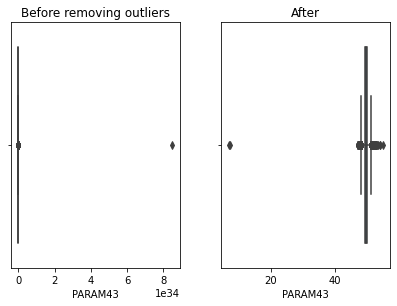

<Figure size 2160x1296 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(1,2)
plt.tight_layout()
plt.figure(figsize=(30,18), facecolor='blue')
sns.boxplot(data_train_before['PARAM43'],orient='h',ax=axes[0])
axes[0].title.set_text("Before removing outliers")
sns.boxplot(data_train['PARAM43'],orient='h',ax=axes[1])
axes[1].title.set_text("After")
plt.show()

## Regression models:

### Random Forest Regression

Let's split our data into two teams: training and testing

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_train.drop(columns =['ProbeYield']), data_train['ProbeYield'], test_size=0.25, random_state=42)

Just a plot to visualize predictions' differencies:

In [ ]:
from plotly import graph_objects as go 
import plotly.express as px

def plot_prediction_results(title, true, predicted):
    fig = go.Figure(data=go.Scatter(x=[0,60], y=[0,60], mode="lines", name="real y = pred y"))
    fig.add_scatter(x=true, y=predicted, name="test, prediction", mode="markers")
    fig.update_layout(
        title=f"{title} | MSE: {mean_squared_error(true, np.array(predicted))}",
        xaxis_title="Real values",
        yaxis_title="Predicted values",
    )
    fig.update_layout(yaxis=dict(range=[0,50], scaleratio=1))
    fig.update_layout(xaxis=dict(range=[0,50], scaleratio=1))
    fig.show()

There we first use RandomForestRegressor. I have cheated a bit and found out that these parameters are acceptable:

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=60,random_state=42, max_depth=23, min_samples_leaf=3)

reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score Random Forest Regression: " +"{:.3}".format(r2_score(y_test, y_pred)));

R2 Score Random Forest Regression: 0.598


Hah, almost 0.6, good!

In [ ]:
def print_results(y_test, y_pred):
    plt.scatter(y_test,y_pred)
    plt.grid()
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.title('scatter plot between actual y and predicted y')
    plt.show()
    print('Mean Squared Error :',mean_squared_error(y_test, y_pred))
    print('Mean Absolute Error :',mean_absolute_error(y_test, y_pred) )

In [ ]:
plot_prediction_results("RandomForest Regression", y_test, y_pred)

### AdaBoost Regression

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

As we are going to use Decision Tree as our tree base, let's figure out which parameters may inluence our predictoins in the best possible way:

In [ ]:
for depth in range (2,11):
     tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
     if tree_regressor.fit(x_train,y_train).tree_.max_depth<depth:
         break
     score=np.mean(cross_val_score(tree_regressor,x_train,y_train,scoring='neg_mean_squared_error', cv=5,n_jobs=1))
     print(depth, score)

2 -17.02799306179101
3 -16.48366480771433
4 -15.427301838469324
5 -14.4566212109189
6 -13.90982281510875
7 -13.55632137617636
8 -13.319557086983846
9 -13.070881069954037
10 -13.025038413440502


Here we are: max_depth definitely should be 10.

I was trying to do the tunning of hyperparameters for AdaBoostRegressor, but it took me about 6 hours and still I was left with a word "Executing" instead of list of best hyperparameters. So, we will use simple one just to show that AdaBoost can be used in this problem of regression too:

In [ ]:
ab_reg_params = AdaBoostRegressor(
    base_estimator=tree.DecisionTreeRegressor(max_depth=10, random_state=1),
    n_estimators=500,
    learning_rate=0.001,
    random_state=1)
ab_reg_params.fit(x_train, y_train)
y_pred_ab = ab_reg_params.predict(x_test)


In [ ]:
print("R2 Score AdaBoost Regression: " +"{:.3}".format(r2_score(y_test, y_pred_ab)));

R2 Score AdaBoost Regression: 0.423


The predictions are worst than previous with Random Forest Regressor but still not so bad... I would rather use Artificial neural network next time, cause I expect a lot more there.

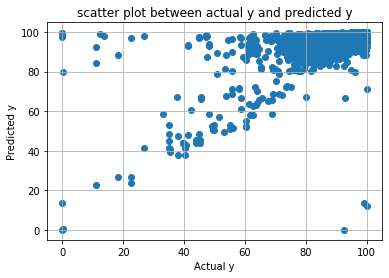

Mean Squared Error : 9.367999424532746
Mean Absolute Error : 1.228289695182268


In [ ]:
print_results(y_test, y_pred_ab)

As the conclusion: it was really hard to make the accuracy at least more than 55%. I know that's not so impressive as it used to be in the first project concerned classifying, but I really tried more than 15 hours and got myself there only. As my family said: "Better than a half - enough" :) Thank you for being there with me and my project, I appreciate it.

In [ ]:
data_test = data_test.dropna(axis = 0)
data_test.shape

(96308, 71)

There we run our regressor on data_test data set:

In [ ]:
df = pd.DataFrame(y_pred)
df.to_csv('zeger.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b1785a09-ebf2-41e2-92dd-f137fad09fb2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>